In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import tensorflow as tf
tf.compat.v1.enable_eager_execution()
%config Completer.use_jedi = False  # 자동완성 속도 증가

In [2]:
# IMDB 데이터셋 로드
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

C:\Anaconda3\envs\deep\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:128: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Anaconda3\envs\deep\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:129: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [3]:
max([max(sequence) for sequence in train_data])

9999

In [4]:
# 리뷰를 다시 텍스트로 디코딩
word_index = imdb.get_word_index() # word_index는 단어와 정수 인덱스를 매핑한 딕셔너리
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]) # 정수 인덱스와 단어를 매핑하도록 뒤집기
decorded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]]) # 리뷰를 디코딩, 0, 1, 2 는 예약어 이므로 인덱스에서 3을 뺌

In [5]:
# 정수 시퀀스를 멀티 핫 인코딩으로 인코딩
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequences in enumerate(sequences):
        for j in sequences:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [6]:
print(x_train.shape)
print(y_train.shape)

(25000, 10000)
(25000,)


In [7]:
# 모델 정의하기
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [8]:
# 모델 컴파일
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [9]:
# 검증 세트 준비
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [10]:
# 모델 훈련
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/20
15000/15000 [==============================] - 2s 124us/sample - loss: 0.5085 - acc: 0.7895 - val_loss: 0.3963 - val_acc: 0.8573
Epoch 2/20
15000/15000 [==============================] - 1s 87us/sample - loss: 0.3061 - acc: 0.9022 - val_loss: 0.3124 - val_acc: 0.8819
Epoch 3/20
15000/15000 [==============================] - 1s 84us/sample - loss: 0.2251 - acc: 0.9261 - val_loss: 0.2769 - val_acc: 0.8909
Epoch 4/20
15000/15000 [==============================] - 1s 85us/sample - loss: 0.1797 - acc: 0.9398 - val_loss: 0.2755 - val_acc: 0.8886
Epoch 5/20
15000/15000 [==============================] - 1s 85us/sample - loss: 0.1443 - acc: 0.9534 - val_loss: 0.2787 - val_acc: 0.8885
Epoch 6/20
15000/15000 [==============================] - 1s 83us/sample - loss: 0.1208 - acc: 0.9623 - val_loss: 0.2899 - val_acc: 0.8864
Epoch 7/20
15000/1500

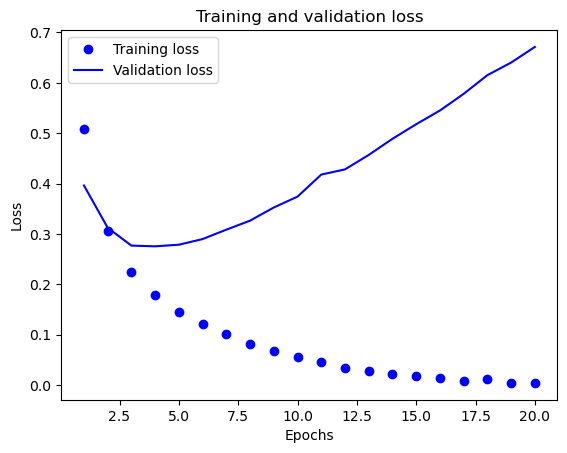

In [20]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss') # bo는 파란색 점
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') # b는 파란색 실선
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [19]:
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

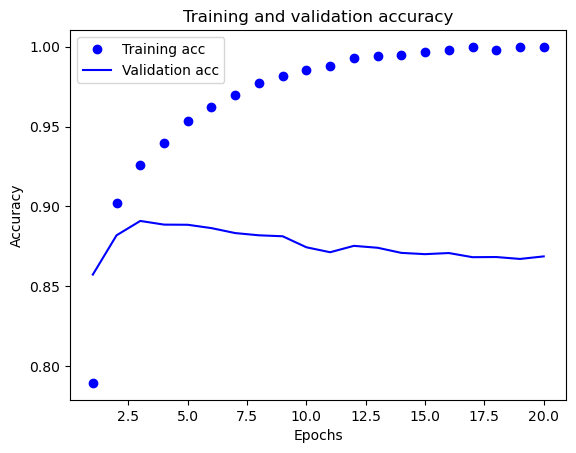

In [22]:
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [25]:
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
25000/25000 [==============================] - 2s 67us/sample - loss: 0.4828 - acc: 0.8186
Epoch 2/4
25000/25000 [==============================] - 1s 53us/sample - loss: 0.2720 - acc: 0.9064
Epoch 3/4
25000/25000 [==============================] - 1s 52us/sample - loss: 0.2070 - acc: 0.9264
Epoch 4/4
25000/25000 [==============================] - 2s 94us/sample - loss: 0.2871 - acc: 0.8867


[0.28713915091991427, 0.88672]

In [26]:
model.predict(x_test)

array([[0.23292068],
       [0.999689  ],
       [0.9327723 ],
       ...,
       [0.11834323],
       [0.08916673],
       [0.5384673 ]], dtype=float32)

In [28]:
# 추가실험 : 표현층 1개
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
print(results)
model.predict(x_test)

Epoch 1/4
25000/25000 [==============================] - 1s 56us/sample - loss: 0.4518 - acc: 0.8334
Epoch 2/4
25000/25000 [==============================] - 1s 52us/sample - loss: 0.2812 - acc: 0.9064
Epoch 3/4
25000/25000 [==============================] - 1s 53us/sample - loss: 0.2222 - acc: 0.9237
Epoch 4/4
25000/25000 [==============================] - 2s 92us/sample - loss: 0.2803 - acc: 0.8879
[0.2802558357906342, 0.88792]


array([[0.2621408 ],
       [0.99980783],
       [0.8734432 ],
       ...,
       [0.12965754],
       [0.10329348],
       [0.5716919 ]], dtype=float32)

In [29]:
# 추가실험 : 표현층 3개
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
print(results)
model.predict(x_test)

Epoch 1/4
25000/25000 [==============================] - 1s 58us/sample - loss: 0.4445 - acc: 0.8178
Epoch 2/4
25000/25000 [==============================] - 1s 54us/sample - loss: 0.2438 - acc: 0.9117
Epoch 3/4
25000/25000 [==============================] - 1s 54us/sample - loss: 0.1931 - acc: 0.9269
Epoch 4/4
25000/25000 [==============================] - 2s 95us/sample - loss: 0.3111 - acc: 0.8798
[0.3111437478876114, 0.8798]


array([[0.14465734],
       [0.9994493 ],
       [0.96294415],
       ...,
       [0.13304693],
       [0.04987609],
       [0.71714294]], dtype=float32)

In [31]:
# 추가실험 : 층의 유닛 추가
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
print(results)
model.predict(x_test)

Epoch 1/4
25000/25000 [==============================] - 1s 58us/sample - loss: 0.4518 - acc: 0.8205
Epoch 2/4
25000/25000 [==============================] - 1s 53us/sample - loss: 0.2547 - acc: 0.9080
Epoch 3/4
25000/25000 [==============================] - 1s 55us/sample - loss: 0.1955 - acc: 0.9300
Epoch 4/4
25000/25000 [==============================] - 3s 104us/sample - loss: 0.3234 - acc: 0.8756
[0.3233824469089508, 0.87556]


array([[0.27908796],
       [0.9999348 ],
       [0.9475651 ],
       ...,
       [0.21817806],
       [0.10249126],
       [0.82539546]], dtype=float32)

In [32]:
# 추가실험 : 손실함수 mse 사용
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='rmsprop',
             loss='mse',
             metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
print(results)
model.predict(x_test)

Epoch 1/4
25000/25000 [==============================] - 1s 59us/sample - loss: 0.1633 - acc: 0.8090
Epoch 2/4
25000/25000 [==============================] - 1s 54us/sample - loss: 0.0838 - acc: 0.9090
Epoch 3/4
25000/25000 [==============================] - 1s 56us/sample - loss: 0.0614 - acc: 0.9300
Epoch 4/4
25000/25000 [==============================] - 2s 82us/sample - loss: 0.0883 - acc: 0.8795
[0.08830929054498672, 0.87952]


array([[0.16161329],
       [0.99968743],
       [0.79819655],
       ...,
       [0.13873291],
       [0.11045215],
       [0.55333346]], dtype=float32)

In [34]:
# 추가실험 : tanh 활성화 함수 사용
model = keras.Sequential([
    layers.Dense(16, activation='tanh'),
    layers.Dense(32, activation='tanh'),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
print(results)
model.predict(x_test)

Epoch 1/4
25000/25000 [==============================] - 1s 60us/sample - loss: 0.4156 - acc: 0.8255
Epoch 2/4
25000/25000 [==============================] - 1s 53us/sample - loss: 0.2227 - acc: 0.9157
Epoch 3/4
25000/25000 [==============================] - 1s 54us/sample - loss: 0.1756 - acc: 0.9346
Epoch 4/4
25000/25000 [==============================] - 3s 107us/sample - loss: 0.3844 - acc: 0.8618
[0.38441807333946226, 0.86176]


array([[0.17421341],
       [0.9997019 ],
       [0.9659686 ],
       ...,
       [0.2870426 ],
       [0.0838795 ],
       [0.95048165]], dtype=float32)